1. Compute and plot the empirical probability mass function.
2. Compute and plot the empirical cumulative distribution.

In [267]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [268]:
outcomes = np.array([1, 2, 3, 4, 5, 6])
counts = np.array([200, 100, 300, 50, 150, 200])

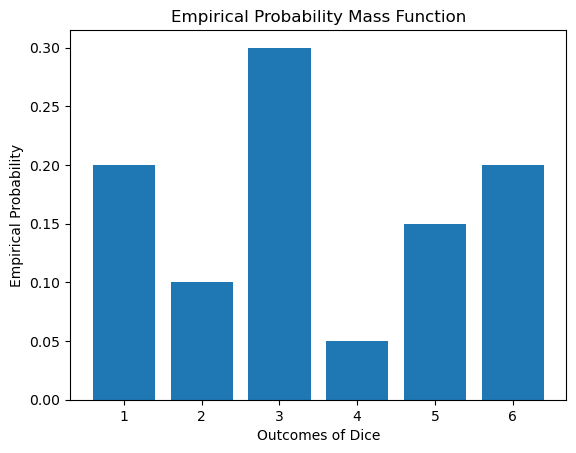

In [269]:
total_counts = np.sum(counts)
emp_pmf = counts/total_counts

plt.bar(outcomes, emp_pmf, align='center')
plt.xlabel('Outcomes of Dice')
plt.ylabel('Empirical Probability')
plt.title('Empirical Probability Mass Function')
plt.xticks(outcomes)
plt.show()

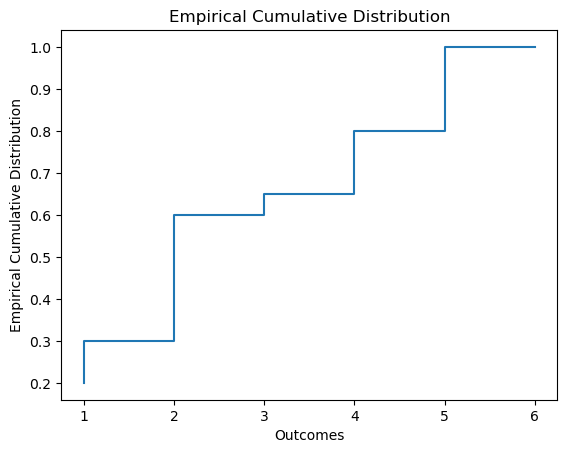

In [270]:
emp_cdf = np.cumsum(emp_pmf)

plt.step(outcomes, emp_cdf)
plt.xlabel('Outcomes')
plt.ylabel('Empirical Cumulative Distribution')
plt.title('Empirical Cumulative Distribution')
plt.xticks(outcomes)
plt.show()



1. Min-max normalization
2. Standard score normalization (i.e., standardization)



In [271]:
D = [[0,1,2,3,4,5],
     [0.3,-0.4,-1,-1.6,-2.2,-2.8]]

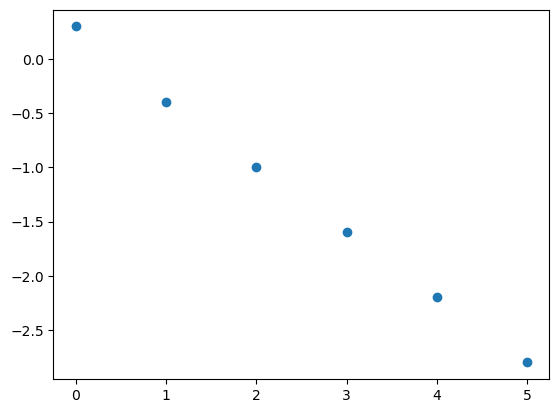

In [272]:
DM = np.transpose(D)
plt.scatter(x= DM[:,0],y= DM[:,1])

[[0.         1.        ]
 [0.2        0.77419355]
 [0.4        0.58064516]
 [0.6        0.38709677]
 [0.8        0.19354839]
 [1.         0.        ]]


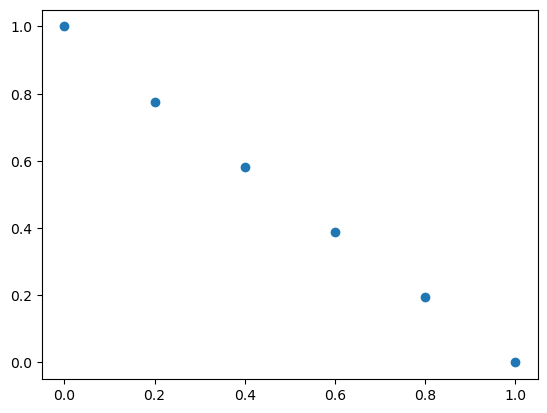

In [273]:
from sklearn import preprocessing
import numpy as np

DM = np.transpose(D)
min_max_scaler = preprocessing.MinMaxScaler()
DM_minmax = min_max_scaler.fit_transform(DM)
plt.scatter(x= DM_minmax[:,0],y= DM_minmax[:,1])
print(DM_minmax)

[[-1.46385011  1.50869694]
 [-0.87831007  0.84169408]
 [-0.29277002  0.26997735]
 [ 0.29277002 -0.30173939]
 [ 0.87831007 -0.87345612]
 [ 1.46385011 -1.44517286]]


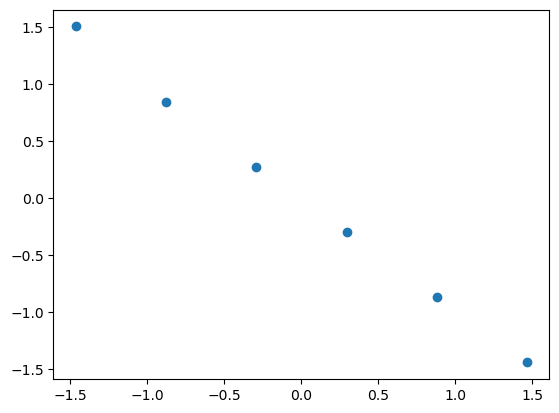

In [274]:
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()

DM = np.transpose(D)
min_max_scaler = preprocessing.StandardScaler()
DM_minmax = min_max_scaler.fit_transform(DM)
plt.scatter(DM_minmax[:,0],y= DM_minmax[:,1])
print(DM_minmax)


Please access the Iris Flower Dataset via Sklearn and select the following two attributes: petal length and petal width.
1. Discretize the petal length into four groups (very short, short, long, verylong) and petal width into three groups (short, medium, and long) using equal-width intervals.
2. Create contingency table for the two attributes.
3. Are these two features independent? Why or why not? (hint: use Chisquared test with α = 0.01).


In [275]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [276]:
iris = datasets.load_iris()

data_frame = pd.DataFrame(iris.data, columns = iris.feature_names)

In [277]:
data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [278]:
data_f = data_frame[['petal length (cm)','petal width (cm)']]

In [279]:
data_f

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [280]:
data_f['length_categorical'], length_bins = pd.cut(data_f['petal length (cm)'], bins=4, right=True, labels=['very short', 'short', 'long', 'very long'], retbins=True)

In [281]:
data_f['width_categorical'], width_bins = pd.cut(data_f['petal width (cm)'], bins=3, right=True, labels=['short', 'medium', 'long'], retbins=True)

In [282]:
data_f

,petal length (cm),petal width (cm),length_categorical,width_categorical
0,1.4,0.2,very short,short
1,1.4,0.2,very short,short
2,1.3,0.2,very short,short
3,1.5,0.2,very short,short
4,1.4,0.2,very short,short
...,...,...,...,...
145,5.2,2.3,long,long
146,5.0,1.9,long,long
147,5.2,2.0,long,long
148,5.4,2.3,long,long


In [283]:
data_fcontingency = pd.crosstab(index = data_f['length_categorical'], columns = data_f['width_categorical'], margins = True)

In [284]:
data_fcontingency

width_categorical,short,medium,long,All
length_categorical,,,,
very short,50,0,0,50
short,0,11,0,11
long,0,41,20,61
very long,0,2,26,28
All,50,54,46,150


In [285]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_fcontingency)

alpha = 0.01
if p<=alpha:
    print ('The two features are dependent.')
else:
    print ('The two features are independent.')

The two features are dependent.


In [286]:
print (stat, p, dof, expected)

207.61010985529873 8.733136759563502e-38 12 [[ 16.66666667  18.          15.33333333  50.        ]
 [  3.66666667   3.96         3.37333333  11.        ]
 [ 20.33333333  21.96        18.70666667  61.        ]
 [  9.33333333  10.08         8.58666667  28.        ]
 [ 50.          54.          46.         150.        ]]


Dimensionality Reduction
For each dataset:
1. Find the covariance matrix.
2. Find the eigenvectors and eigenvalues of the covariance matrix.
3. Find (and plot) the projection of the data points into the 2-D and 1-D principal components (hint: use PCA). After projecting the data into 2-D and 1-D, provide a short discussion (2-3 sentences) of the results for each dataset that answers the following question: Does the projection preserve the “important” or “most informative” structure for the original data? Why or why not?



Swissroll - 3D

Covariance of given dataset : 
 [[43.28820984  0.15350743  4.45552413]
 [ 0.15350743 10.5799816   0.15438407]
 [ 4.45552413  0.15438407 47.15478185]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [50.0795283  40.36467911 10.57876589]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[ 0.54862373  0.83605889  0.00418753]
 [ 0.00539983  0.00146519 -0.99998435]
 [ 0.83605194 -0.54863776  0.00371074]]


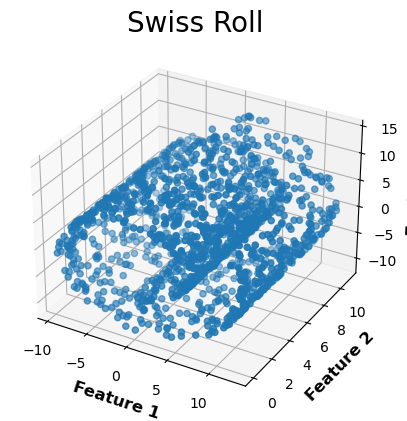

In [287]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as la
from sklearn.decomposition import PCA as pca


Data_swissroll = np.loadtxt("swissroll.txt")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Data_swissroll[:,0], Data_swissroll[:,1], Data_swissroll[:,2])
ax.set_xlabel('Feature 1', fontsize=12, fontdict=dict(weight='bold'))
ax.set_ylabel('Feature 2', fontsize=12, fontdict=dict(weight='bold'))
ax.set_zlabel('Feature 3', fontsize=12, fontdict=dict(weight='bold'))
ax.set_title('Swiss Roll', fontsize = 20)

Covariance = np.cov(Data_swissroll.T)
print ("Covariance of given dataset : \n", Covariance)
    
Eigenvalues, Eigenvectors = la.eig(Covariance)
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
    

Swissroll 2D

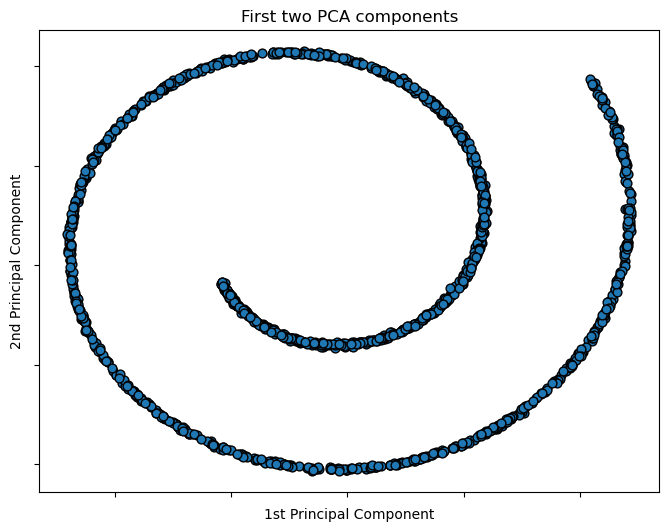

[[43.28820984  0.15350743  4.45552413]
 [ 0.15350743 10.5799816   0.15438407]
 [ 4.45552413  0.15438407 47.15478185]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [50.0795283  40.36467911]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[ 0.54862373  0.00539983  0.83605194]
 [-0.83605889 -0.00146519  0.54863776]]

 Explained Variance Ratio: [0.49572416 0.39955941]


In [288]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P2 = PCA(n_components=2, random_state=0)
X_reduced = P2.fit_transform(Data_swissroll)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()

print (P2.get_covariance())
Eigenvalues = P2.explained_variance_
Eigenvectors = P2.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P2.explained_variance_ratio_)

Short discussion- This plot cannot be seperated, hence the projection will not be presereved as the most informative stucture.

Swissroll 1D

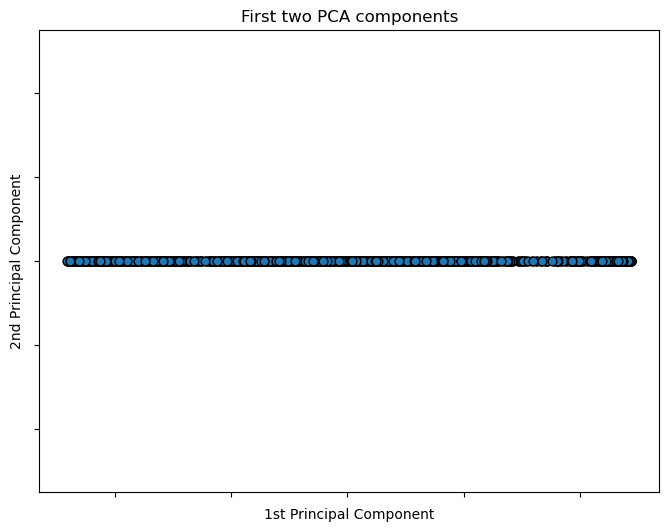

[[32.87837677  0.07290003 11.28705755]
 [ 0.07290003 25.47244002  0.11109292]
 [11.28705755  0.11109292 42.6721565 ]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [50.0795283]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[0.54862373 0.00539983 0.83605194]]

 Explained Variance Ratio: [0.49572416]


In [289]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P1 = PCA(n_components=1, random_state=0)
X_reduced = P1.fit_transform(Data_swissroll)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 0]*0,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()


print (P1.get_covariance())
Eigenvalues = P1.explained_variance_
Eigenvectors = P1.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P1.explained_variance_ratio_)

Short discussion- This plot cannot be seperated, hence the projection will not be presereved as the most informative stucture.

Sphere 3D

Covariance of given dataset : 
 [[10.03680105  8.97432389  9.09405411]
 [ 8.97432389  9.92456694  9.06781571]
 [ 9.09405411  9.06781571 10.26264334]]

 Eigenvalues of Covariance matrix of the sphere dataset:  [28.16682086  1.05706468  1.00012579]

 Eigenvectors of Covariance matrix of the given sphere dataset:  [[-0.57604721 -0.62074794  0.53182855]
 [-0.57310984 -0.15721136 -0.80425723]
 [-0.58285051  0.76808632  0.26519558]]


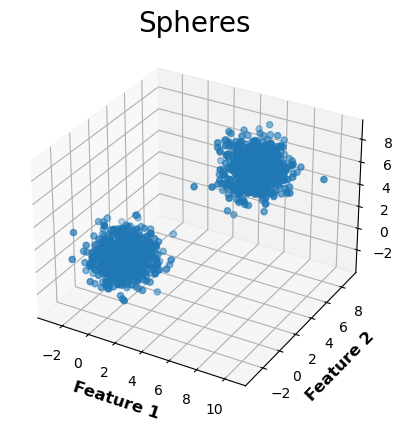

In [290]:
Data_spheres = np.loadtxt("spheres.txt")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Data_spheres[:,0], Data_spheres[:,1], Data_spheres[:,2])
ax.set_xlabel('Feature 1', fontsize=12, fontdict=dict(weight='bold'))
ax.set_ylabel('Feature 2', fontsize=12, fontdict=dict(weight='bold'))
ax.set_zlabel('Feature 3', fontsize=12, fontdict=dict(weight='bold'))
ax.set_title('Spheres', fontsize = 20)

Covariance = np.cov(Data_spheres.T)
print ("Covariance of given dataset : \n", Covariance)
    
Eigenvalues, Eigenvectors = la.eig(Covariance)
print("\n Eigenvalues of Covariance matrix of the sphere dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given sphere dataset: ", Eigenvectors)

Sphere 2D

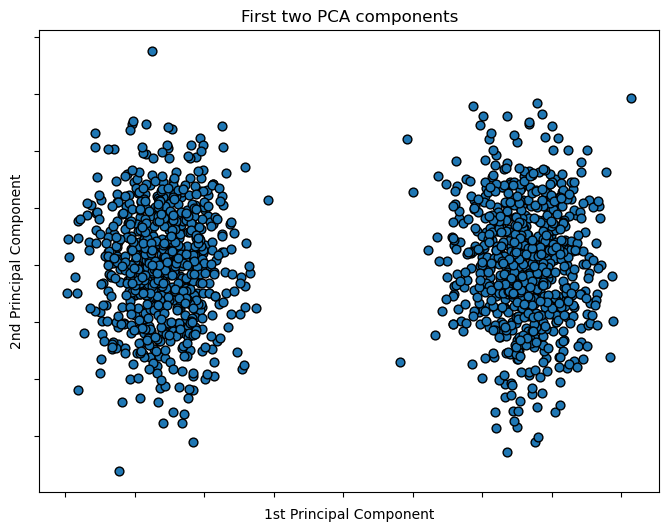

[[10.03680105  8.97432389  9.09405411]
 [ 8.97432389  9.92456694  9.06781571]
 [ 9.09405411  9.06781571 10.26264334]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [28.16682086  1.05706468]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[ 0.57604721  0.57310984  0.58285051]
 [ 0.62074794  0.15721136 -0.76808632]]

 Explained Variance Ratio: [0.93193523 0.03497433]


In [291]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P2 = PCA(n_components=2, random_state=0)
X_reduced = P2.fit_transform(Data_spheres)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()

print (P2.get_covariance())
Eigenvalues = P2.explained_variance_
Eigenvectors = P2.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P2.explained_variance_ratio_)

Short discussion- This plot can be seperated, hence the projection will be presereved as the most informative stucture.

Sphere 1D

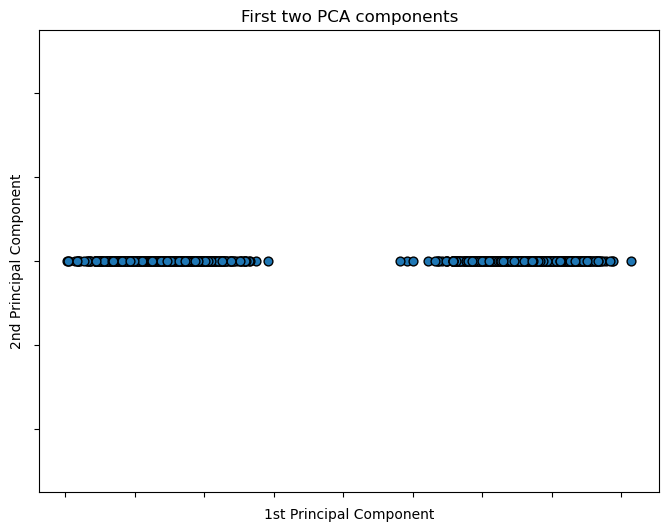

[[10.03388332  8.95936844  9.11164329]
 [ 8.95936844  9.94227819  9.06518133]
 [ 9.11164329  9.06518133 10.24784982]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [28.16682086]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[0.57604721 0.57310984 0.58285051]]

 Explained Variance Ratio: [0.93193523]


In [292]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P1 = PCA(n_components=1, random_state=0)
X_reduced = P1.fit_transform(Data_spheres)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 0]*0,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()

print (P1.get_covariance())
Eigenvalues = P1.explained_variance_
Eigenvectors = P1.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P1.explained_variance_ratio_)

Short discussion- This plot can be seperated, hence the projection will be presereved as the most informative stucture.

Ellipsoid 3D

Covariance of given dataset : 
 [[57.86612579 14.69340976  7.36636505]
 [14.69340976  9.86297683  4.52643488]
 [ 7.36636505  4.52643488  3.35700682]]

 Eigenvalues of Covariance matrix of the ellipsoids dataset:  [63.16525144  6.88564784  1.03521016]

 Eigenvectors of Covariance matrix of the given ellipsoids dataset:  [[ 0.95175893  0.30681239  0.00459253]
 [ 0.27407997 -0.8433001  -0.46230412]
 [ 0.13796775 -0.4412608   0.88670954]]


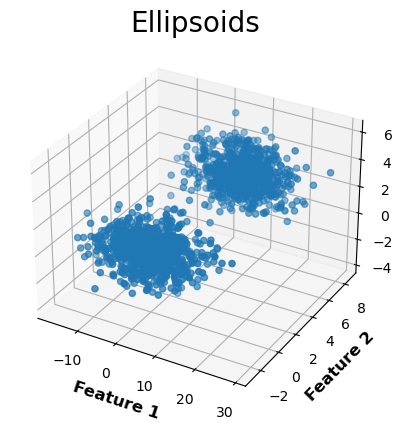

In [293]:
Data_ellipsoids = np.loadtxt("ellipsoids.txt")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Data_ellipsoids[:,0], Data_ellipsoids[:,1], Data_ellipsoids[:,2])
ax.set_xlabel('Feature 1', fontsize=12, fontdict=dict(weight='bold'))
ax.set_ylabel('Feature 2', fontsize=12, fontdict=dict(weight='bold'))
ax.set_zlabel('Feature 3', fontsize=12, fontdict=dict(weight='bold'))
ax.set_title('Ellipsoids', fontsize = 20)

Covariance = np.cov(Data_ellipsoids.T)
print ("Covariance of given dataset : \n", Covariance)
    
Eigenvalues, Eigenvectors = la.eig(Covariance)
print("\n Eigenvalues of Covariance matrix of the ellipsoids dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given ellipsoids dataset: ", Eigenvectors)

Ellipsoid 2D

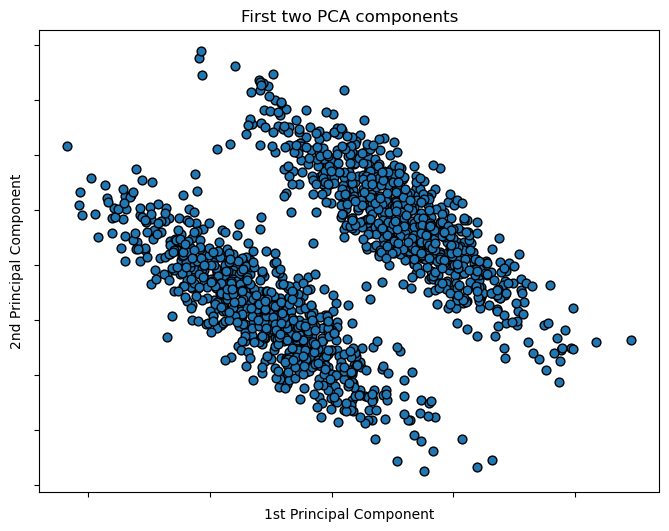

[[57.86612579 14.69340976  7.36636505]
 [14.69340976  9.86297683  4.52643488]
 [ 7.36636505  4.52643488  3.35700682]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [63.16525144  6.88564784]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[ 0.95175893  0.27407997  0.13796775]
 [-0.30681239  0.8433001   0.4412608 ]]

 Explained Variance Ratio: [0.88857376 0.09686348]


In [294]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P2 = PCA(n_components=2, random_state=0)
X_reduced = P2.fit_transform(Data_ellipsoids)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()

print (P2.get_covariance())
Eigenvalues = P2.explained_variance_
Eigenvectors = P2.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P2.explained_variance_ratio_)

Short discussion- This plot can be seperated, hence the projection will be presereved as the most informative stucture.

Ellipsoid 1D

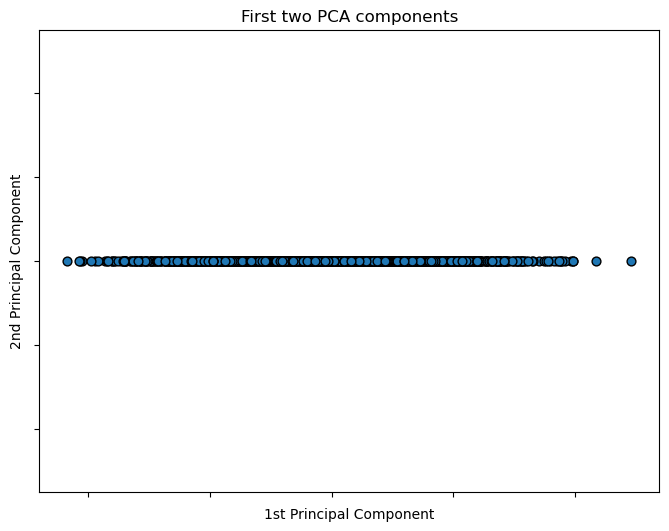

[[57.5908254  15.44405535  7.7743059 ]
 [15.44405535  8.40788533  2.23878283]
 [ 7.7743059   2.23878283  5.08739871]]

 Eigenvalues of Covariance matrix of the given swissroll dataset:  [63.16525144]

 Eigenvectors of Covariance matrix of the given swissroll dataset:  [[0.95175893 0.27407997 0.13796775]]

 Explained Variance Ratio: [0.88857376]


In [295]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

P1 = PCA(n_components=1, random_state=0)
X_reduced = P1.fit_transform(Data_ellipsoids)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 0]*0,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA components")
ax.set_xlabel("1st Principal Component")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Principal Component")
ax.yaxis.set_ticklabels([])

plt.show()

print (P1.get_covariance())
Eigenvalues = P1.explained_variance_
Eigenvectors = P1.components_
    
print("\n Eigenvalues of Covariance matrix of the given swissroll dataset: ", Eigenvalues)
print("\n Eigenvectors of Covariance matrix of the given swissroll dataset: ", Eigenvectors)
print("\n Explained Variance Ratio:", P1.explained_variance_ratio_)


Short discussion- This plot cannot be seperated, hence the projection will not be presereved as the most informative stucture. 

Refrences -       https://numpy.org/doc/stable/reference/index.html

             https://scikit-learn.org/stable/tutorial/basic/tutorial.html
            
             https://matplotlib.org/stable/tutorials/introductory/pyplot.html
            
             https://pandas.pydata.org/docs/user_guide/10min.html
             
             ECEN_758_Lecture_4_Dimensionality_Reduction.ipynb
             
            https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
            